# Forecasting the use of a City Bike-Share System 

We are forecasting the use of a city bike-share system depending on the weather.

We are provided hourly rental data spanning two years. The training data is made up of the first 19 days of each month, while the test data is from the 20th to the end of the month.

We are trying to predict the total number of bikes rented during each hour covered by the test set

# Data Fields

These are the data fields for our CSV Files

* **Datetime**: 
 * Hourly Date + Timestamp  
* **Seasons**: 
 * 1 = spring
 * 2 = summer
 * 3 = fall
 * 4 = winter 
* **Holiday**: 
 * 0 = No Holiday
 * 1 = Holiday
* **Working Day**: 
 * If the day is neither a weekend nor holiday
* **Weather**: 
 * 1: Clear, Few clouds, Partly cloudy
 * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 * 4: Heavy Rain + Hail + Thunderstorm + Mist, Snow + Fog 
* **Temp**: 
 * Temperature in Celsius
* **ATemp**: 
 * "Feels Like" Temperature in Celsius
* **Humidity**: 
 * Relative Humidity
* **Windspeed**:
 * Wind Speed
* **Casual**:
 * Number of non-registered user rentals initiated
* **Registered**: 
 * Number of registered user rentals initiated
* **Count**: 
 * Number of total rentals`

# Imports

In [2]:
#Images
%matplotlib inline

#Standard Python Imports
import math, time, datetime

#Data Manipulation
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
plt.style.use("seaborn-whitegrid")

from sklearn import model_selection, tree, preprocessing, metrics, linear_model
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Machine Learning
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Data Analysis

### Check if there are Missing Values

In [4]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### Checking values for Variables

In [5]:
train.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [6]:
train.weather.unique()

array([1, 2, 3, 4], dtype=int64)

In [7]:
train.windspeed.unique()

array([ 0.    ,  6.0032, 16.9979, 19.0012, 19.9995, 12.998 , 15.0013,
        8.9981, 11.0014, 22.0028, 30.0026, 23.9994, 27.9993, 26.0027,
        7.0015, 32.9975, 36.9974, 31.0009, 35.0008, 39.0007, 43.9989,
       40.9973, 51.9987, 46.0022, 50.0021, 43.0006, 56.9969, 47.9988])

In [8]:
train.temp.unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [9]:
train.atemp.unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

In [10]:
train.humidity.unique()

array([ 81,  80,  75,  86,  76,  77,  72,  82,  88,  87,  94, 100,  71,
        66,  57,  46,  42,  39,  44,  47,  50,  43,  40,  35,  30,  32,
        64,  69,  55,  59,  63,  68,  74,  51,  56,  52,  49,  48,  37,
        33,  28,  38,  36,  93,  29,  53,  34,  54,  41,  45,  92,  62,
        58,  61,  60,  65,  70,  27,  25,  26,  31,  73,  21,  24,  23,
        22,  19,  15,  67,  10,   8,  12,  14,  13,  17,  16,  18,  20,
        85,   0,  83,  84,  78,  79,  89,  97,  90,  96,  91], dtype=int64)

In [11]:
train.holiday.unique()

array([0, 1], dtype=int64)

### Checking the counts for each value

In [12]:
train.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [13]:
train.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [14]:
train.windspeed.value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64

In [15]:
train.temp.value_counts()

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
13.12    356
17.22    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
38.54      7
0.82       7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64

In [16]:
train.atemp.value_counts()

31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
16.665    381
25.000    365
33.335    364
21.210    356
30.305    350
15.150    338
21.970    328
24.240    327
17.425    314
31.820    299
34.850    283
27.275    282
32.575    272
11.365    271
14.395    269
29.545    257
19.695    255
15.910    254
12.880    247
13.635    237
34.090    224
12.120    195
28.790    175
23.485    170
10.605    166
35.605    159
9.850     127
18.180    123
36.365    123
37.120    118
9.090     107
37.880     97
28.030     80
7.575      75
38.635     74
6.060      73
39.395     67
6.820      63
8.335      63
18.940     45
40.150     45
40.910     39
5.305      25
42.425     24
41.665     23
3.790      16
4.545      11
43.940      7
43.180      7
2.275       7
3.030       7
44.695      3
0.760       2
1.515       1
45.455      1
Name: atemp, dtype: int64

In [17]:
train.humidity.value_counts()

88    368
94    324
83    316
87    289
70    259
     ... 
13      1
10      1
12      1
96      1
91      1
Name: humidity, Length: 89, dtype: int64

In [18]:
train.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

### Visualizing Data

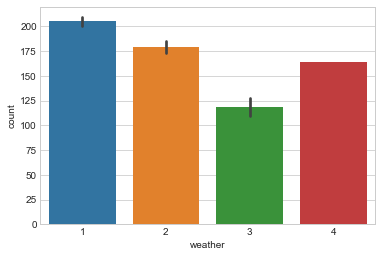

In [19]:
sns.barplot(x = 'weather', y='count', data=train)

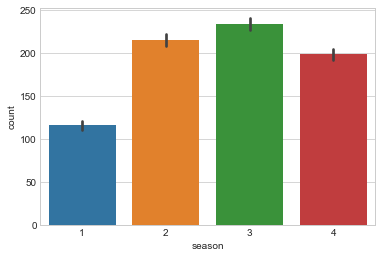

In [20]:
sns.barplot(x = 'season', y='count', data=train)

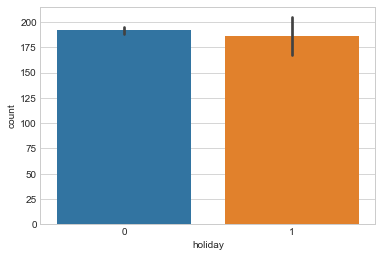

In [21]:
sns.barplot(x = 'holiday', y='count', data=train)

### Checking Seasonal, Holiday, and Weather averages

In [22]:
train[['count', 'holiday']].groupby(['holiday'], as_index = True).mean().sort_values(by='count')

,count
holiday,
1,185.877814
0,191.741655


In [23]:
train[['count', 'season']].groupby(['season'], as_index = True).mean().sort_values(by='count')

,count
season,
1,116.343261
4,198.988296
2,215.251372
3,234.417124


In [24]:
train[['count', 'weather']].groupby(['weather'], as_index = True).mean().sort_values(by='count')

,count
weather,
3,118.846333
4,164.000000
2,178.955540
1,205.236791


### Dates

In [25]:
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [26]:
train.tail(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


From the above parts of a data frame we notice that there are only two years being used, 2011 and 2012. We can convert that into 0 and 1. We can also break each value into different columns. Hour, day, month, and year specifically. 

In [27]:
train['hour'] = [t.hour for t in pd.DatetimeIndex(train.datetime)]
train['day']  = [t.dayofweek for t in pd.DatetimeIndex(train.datetime)]
train["month"] = [t.month for t in pd.DatetimeIndex(train.datetime)]
train['year'] = [t.year for t in pd.DatetimeIndex(train.datetime)]



train['year'] = train['year'].map({2011:0, 2012:1})

### Dividing Training Data into Features
#### Also deciding which columns to drop

In [28]:
X, y = train.iloc[:, 1:], train['count']

We have seen from the training data that the count results from casual + registered. We can easily drop this column and it has no effect

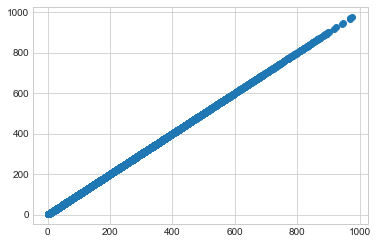

In [29]:
plt.scatter(x = train['casual'] + train['registered'], y = train['count'])

In [30]:
train['casual'] + train['registered']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Length: 10886, dtype: int64

In [31]:
train['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

As we can see from the above graph and the printing out of the values casual + registered = count, we can drop all of those columns

In [32]:
X = X.drop(['registered', 'casual', 'count'], axis = 1)

In [33]:
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,0,5,1,0
1,1,0,0,1,9.02,13.635,80,0.0,1,5,1,0
2,1,0,0,1,9.02,13.635,80,0.0,2,5,1,0
3,1,0,0,1,9.84,14.395,75,0.0,3,5,1,0
4,1,0,0,1,9.84,14.395,75,0.0,4,5,1,0


# Machine Learning Models

### Train-Test Split

In [34]:
#Train-Test Split of 70 and 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=42)

### Converting the model into a similar scale
#### We can use StandardScaler to scale our data

In [35]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.transform(X_test)

### Models
The Models I am going to use
* **Models**
 * Random Forests 
 * Decision Trees

I am using Root Mean Square Log Rrror(RMSLE) as my accuracy metric

### A Function to calculate RMSLE
We use NumPy, and Math to calculate RMSLE

To learn more about RMSLE and RMSE as a Machine Learning Metric go to
https://www.kaggle.com/c/ashrae-energy-prediction/discussion/113064

In [36]:
def rmsle(y, y2):
     acc = math.sqrt(mean_squared_error(np.log(y + 1), np.log(y2 + 1)))
     return acc

### Random Forests

In [37]:
forest = RandomForestRegressor(n_estimators = 100, criterion='mse', random_state=46, n_jobs=-1)
forest.fit(X_train_std, y_train)
y_train_pred = forest.predict(X_train_std)
y_test_pred = forest.predict(x_test_std)
print('RMSLE Train: %.3f' % rmsle(y_train, y_train_pred))
randomforests = rmsle(y_test, y_test_pred)
print('RMSLE Test: %.3f' % rmsle(y_test, y_test_pred))

RMSLE Train: 0.153
RMSLE Test: 0.332


### Decision Trees

In [38]:
dt = DecisionTreeRegressor()
dt.fit(X_train_std, y_train)
y_train_pred2 = dt.predict(X_train_std)
y_test_pred2 = dt.predict(x_test_std)
print('RMSLE Train: %.3f' % rmsle(y_train, y_train_pred2))
decision = rmsle(y_test, y_test_pred2)
print('RMSLE Test: %.3f' % rmsle(y_test, y_test_pred2))

RMSLE Train: 0.002
RMSLE Test: 0.424


# Model Results
#### Using the RMSLE Test Results

### Gradient Boosting

In [39]:
models = pd.DataFrame({
    'Model': ['Decision Trees ', 'Random Forests'],
    'RMSLE': [decision, randomforests]})
print("---RMSLE Scores---")
models.sort_values(by='RMSLE', ascending=True)

---RMSLE Scores---


,Model,RMSLE
1,Random Forests,0.331829
0,Decision Trees,0.423991


From the above table the Random Forests Algorithm has a lower RMSLE which means that, we will use Random Forests for submitting our final CSV

# Submitting Final CSV

#### We are using a similar approach we used as the train.csv file

* **Steps**
 * Convert Date Time
 * Get the X_test and scale the data
 * Predict Y using Random Forests
 * Put final count in the DataFrame
 * Drop remaining columns
 * Convert it to a csv and we are done!

In [130]:
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [131]:
test["hour"] = [t.hour for t in pd.DatetimeIndex(test.datetime)]
test["day"] = [t.dayofweek for t in pd.DatetimeIndex(test.datetime)]
test["month"] = [t.month for t in pd.DatetimeIndex(test.datetime)]
test['year'] = [t.year for t in pd.DatetimeIndex(test.datetime)]
test['year'] = test['year'].map({2011:0, 2012:1})

In [132]:
xt = test.iloc[:, 1:]

In [133]:
xt = scale.transform(xt)

In [134]:
yt = forest.predict(xt)

In [135]:
test['count'] = np.round(yt)

In [136]:
test = test.drop(['holiday', 'season', 'atemp', 'weather', 'temp', 'workingday', 'humidity'
                 ,'windspeed', 'hour', 'day', 'month', 'year' ], axis=1)

In [137]:
test.head()

,datetime,count
0,2011-01-20 00:00:00,12.0
1,2011-01-20 01:00:00,5.0
2,2011-01-20 02:00:00,3.0
3,2011-01-20 03:00:00,3.0
4,2011-01-20 04:00:00,3.0


In [138]:
test.to_csv('submission.csv', index=False)

# Final Thoughts

Since the Bike Sharing Demand uses RMSLE to measure score, I recieved a RMSLE score of 0.47073! At first I had a score of 0.47278 but I tuned my Random Forest initaliziers and got an optimum solution when the n-intializers were 100 and when the random_state was 46.


In the future some ways I would like to improve this model would be to use an ensemble algorithm. Currently, I am using just the Random Forests Algorithm. Maybe for the next time I will use GradientBoosting and Catboost along with Random Forests to improve my score!

# Notes

To learn more about Machine Learning, checkout some other Kaggle Competitions to practice more. Kaggle has a lot of extremely interesting contests which will definitely make you more interested in Machine Learning. 

If you have any questions please create an issue to the repo!

Have a nice day,
Karthik Bhargav